# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad Nurul Fatwa Al Fajar
- **Email:** arulkece50@gmail.com
- **ID Dicoding:** MC009D5Y0699

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apakah Pengaruh Musim Mempengaruhi Penyewaan sepeda?

- Pertanyaan 2 : Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

- Pertanyaan 3 : pada jam keberapa penyewaan sepeda paling banyak dilakukan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/FatwaAlFajar/submission-main/refs/heads/main/data/day.csv")
day_df.head(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   
5        6  2011-01-06       1   0     1        0        4           1   
6        7  2011-01-07       1   0     1        0        5           1   
7        8  2011-01-08       1   0     1        0        6           0   
8        9  2011-01-09       1   0     1        0        0           0   
9       10  2011-01-10       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
5           1  0.204348  0.233209  0.518261   0.089565      88        1518   
6           2  0.196522  0.208839  0.498696   0.168726     148        1362   
7           2  0.165000  0.162254  0.535833   0.266804      68         891   
8           1  0.138333  0.116175  0.434167   0.361950      54         768   
9           1  0.150833  0.150888  0.482917   0.223267      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/FatwaAlFajar/submission-main/refs/heads/main/data/hour.csv")
hour_df.head(10)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   
5        6  2011-01-01       1   0     1   5        0        6           0   
6        7  2011-01-01       1   0     1   6        0        6           0   
7        8  2011-01-01       1   0     1   7        0        6           0   
8        9  2011-01-01       1   0     1   8        0        6           0   
9       10  2011-01-01       1   0     1   9        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           1  0.22  0.2727  0.80     0.0000       8          32   40  
2           1  0.22  0.2727  0.80     0.0000       5          27   32  
3           1  0.24  0.2879  0.75     0.0000       3          10   13  
4           1  0.24  0.2879  0.75     0.0000       0           1    1  
5           2  0.24  0.2576  0.75     0.0896       0           1    1  
6           1  0.22  0.2727  0.80     0.0000       2           0    2  
7           1  0.20  0.2576  0.86     0.0000       1           2    3  
8           1  0.24  0.2879  0.75     0.0000       1           7    8  
9           1  0.32  0.3485  0.76     0.0000       8           6   14

**Insight:**
- Perbandingan antar musim --> Kita bisa mengevaluasi bagaimana jumlah penyewa (baik casual maupun terdaftar) bervariasi di setiap musim.
- day.csv berisi 731 entry data harian
- hour.csv berisi 17379 entry data per jam
- Dampak cuaca –-> Kita bisa menganalisis apakah kondisi cuaca (seperti hujan atau kabut) berpengaruh terhadap jumlah pengguna.
- Hubungan suhu dan angin –-> Kita bisa melihat apakah ada keterkaitan antara suhu, kelembaban, dan kecepatan angin dengan jumlah penyewa.
- Perbedaan pengguna casual dan terdaftar –-> Kita bisa mengecek apakah pengguna casual lebih sering menyewa pada waktu tertentu atau dipengaruhi oleh faktor tertentu (seperti cuaca atau hari kerja).

### Assessing Data

In [4]:
# Load data
hour_df = pd.read_csv('https://raw.githubusercontent.com/FatwaAlFajar/submission-main/refs/heads/main/data/hour.csv')
day_df = pd.read_csv('https://raw.githubusercontent.com/FatwaAlFajar/submission-main/refs/heads/main/data/day.csv')

# Assessing data untuk dataset hour.csv
print("=== INFO DATASET HOUR ===")
print(hour_df.info())
print("\n=== HEAD DATASET HOUR ===")
print(hour_df.head())
print("\n=== MISSING VALUES HOUR ===")
print(hour_df.isnull().sum())
print("\n=== STATISTICS HOUR ===")
print(hour_df.describe())

# Assessing data untuk dataset day.csv
print("\n=== INFO DATASET DAY ===")
print(day_df.info())
print("\n=== HEAD DATASET DAY ===")
print(day_df.head())
print("\n=== MISSING VALUES DAY ===")
print(day_df.isnull().sum())
print("\n=== STATISTICS DAY ===")
print(day_df.describe())

=== INFO DATASET HOUR ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

=== HEAD DATASET 

### Cleaning Data

In [5]:
# **Menghapus data duplikat**
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

# Mengisi missing value hanya pada kolom numerik
day_df.fillna(day_df.select_dtypes(include='number').median(), inplace=True)
hour_df.fillna(hour_df.select_dtypes(include='number').median(), inplace=True)

# Cek ulang setelah cleaning
print("\nJumlah Data Duplikat Setelah Cleaning day_df: ", day_df.duplicated().sum())
print("\nJumlah Data Duplikat Setelah Cleaning hour_df: ", hour_df.duplicated().sum())

print("\nMissing Value Setelah Cleaning day_df:")
print(day_df.isna().sum())
print("\nMissing Value Setelah Cleaning hour_df:")
print(hour_df.isna().sum())



Jumlah Data Duplikat Setelah Cleaning day_df:  0

Jumlah Data Duplikat Setelah Cleaning hour_df:  0

Missing Value Setelah Cleaning day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Value Setelah Cleaning hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Kedua data set telah bersih dan tidak ada yang perlu di cleaning lagi.

## Exploratory Data Analysis (EDA)

### EDA Univariate

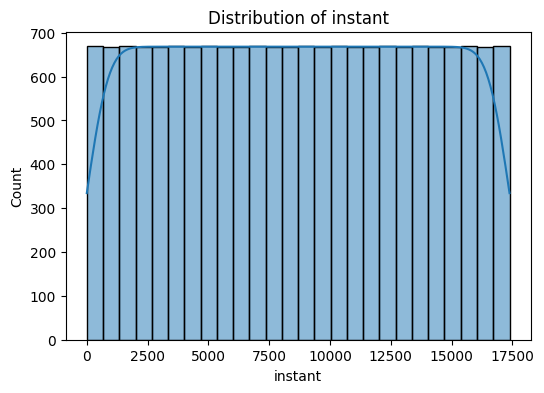

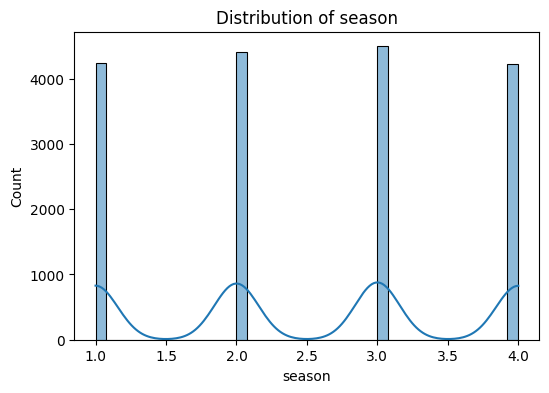

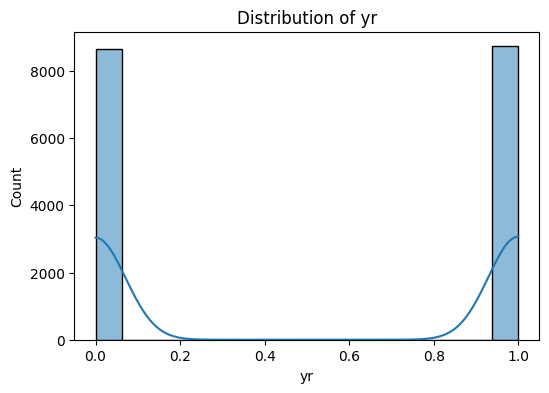

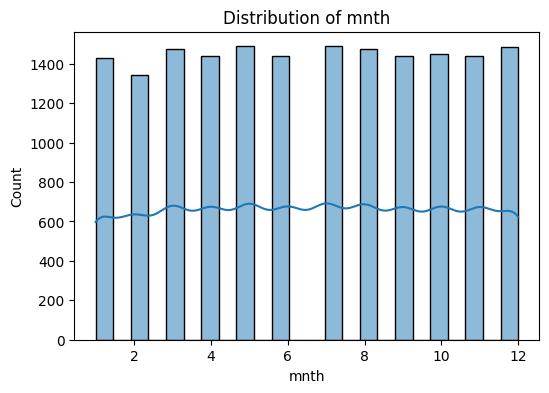

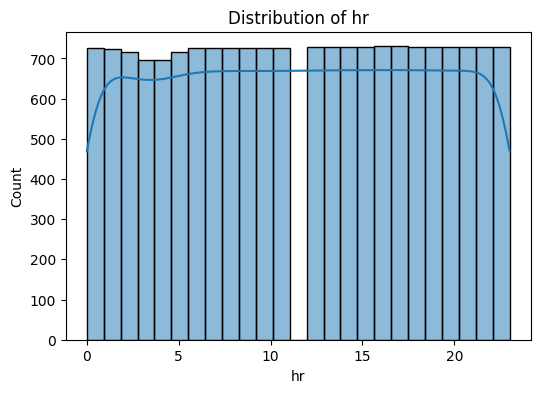

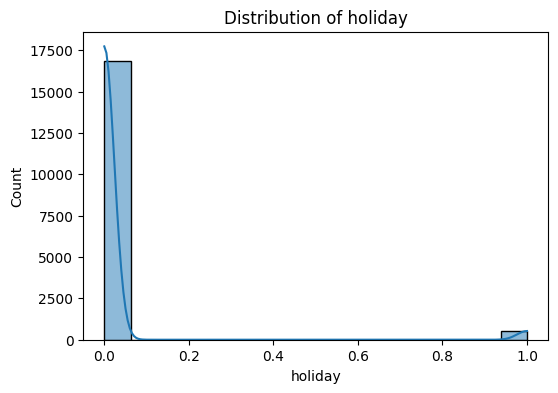

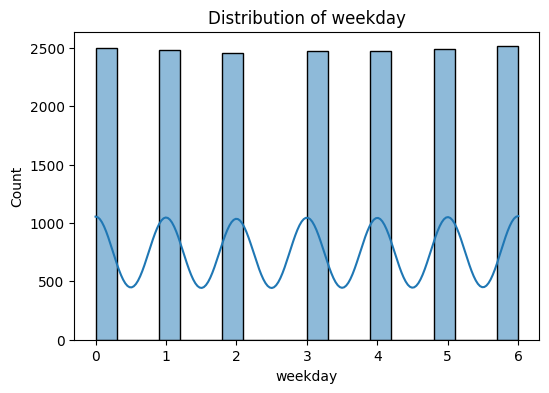

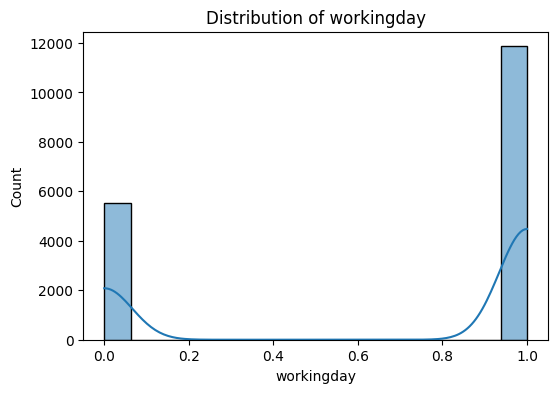

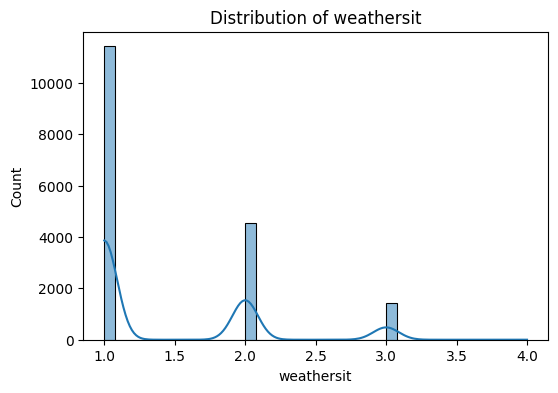

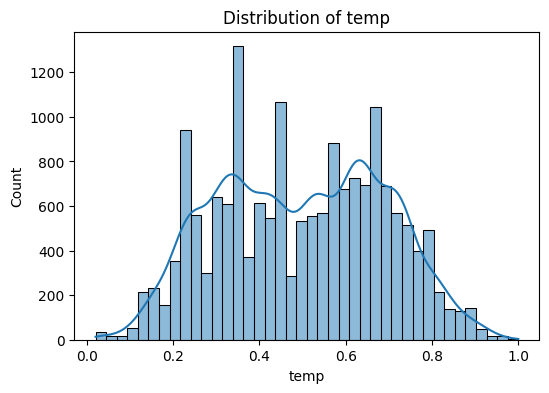

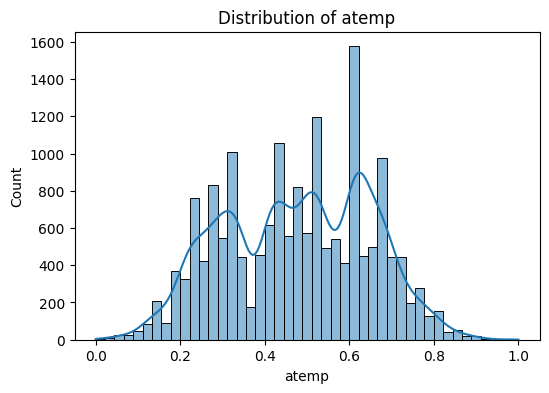

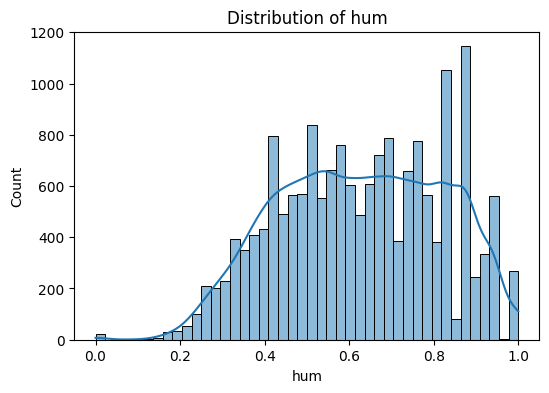

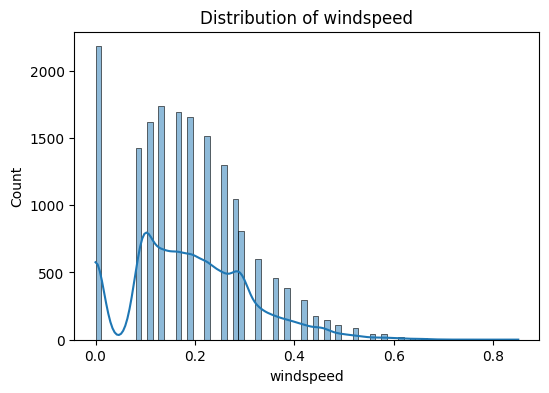

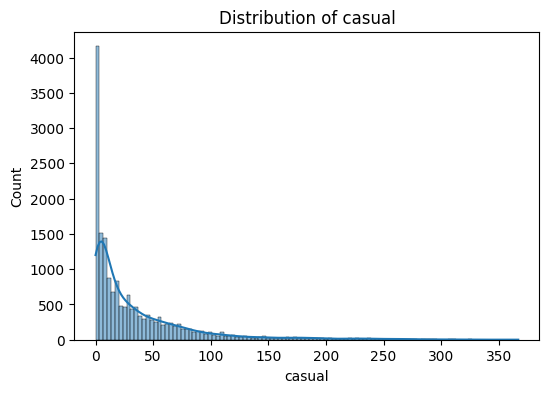

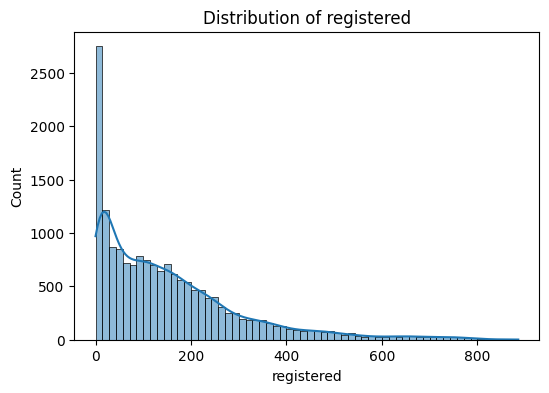

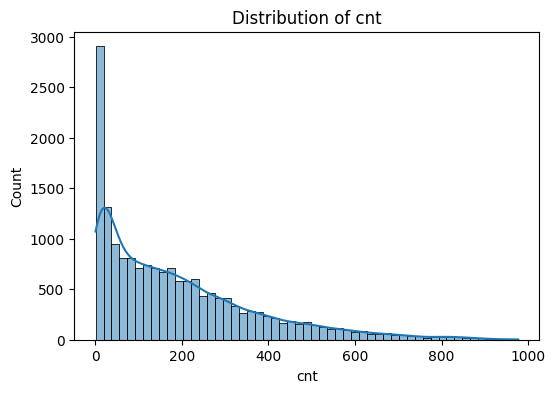

In [6]:
# EDA Univariate
# Distribusi data kolom numerik

numeric_columns = hour_df.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(hour_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### EDA Bivariate

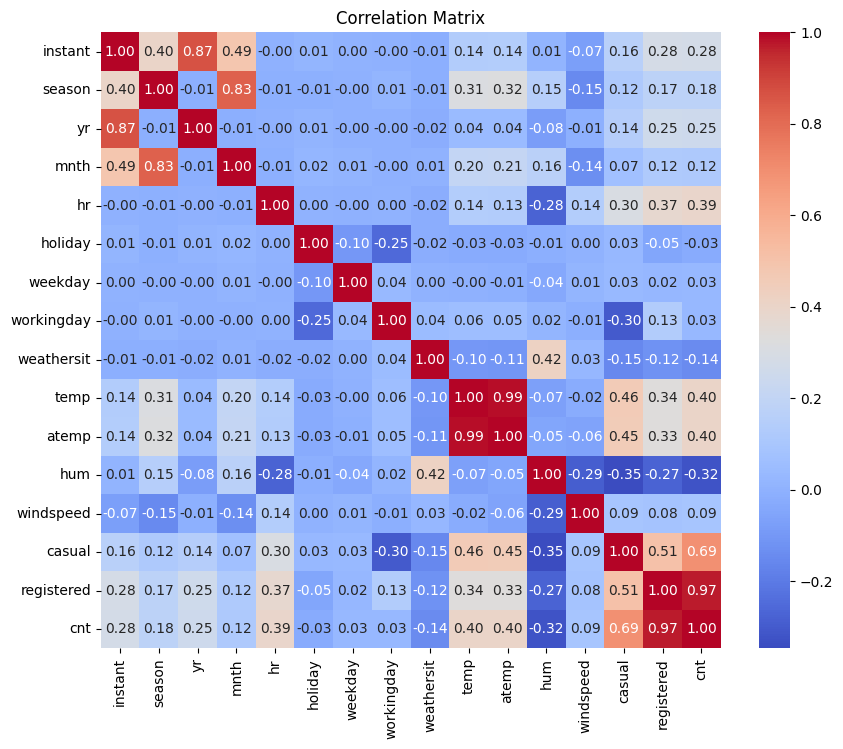

In [7]:
# Periksa apakah kolom tanggal tersedia sebelum dikonversi
if 'datetime' in hour_df.columns:
    hour_df['datetime'] = pd.to_datetime(hour_df['datetime'], errors='coerce')
elif 'dteday' in hour_df.columns:
    hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], errors='coerce')

# Pilih hanya kolom numerik
numeric_df = hour_df.select_dtypes(include=[np.number])

# Plot korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### EDA Multivariate

### Time-series analysis

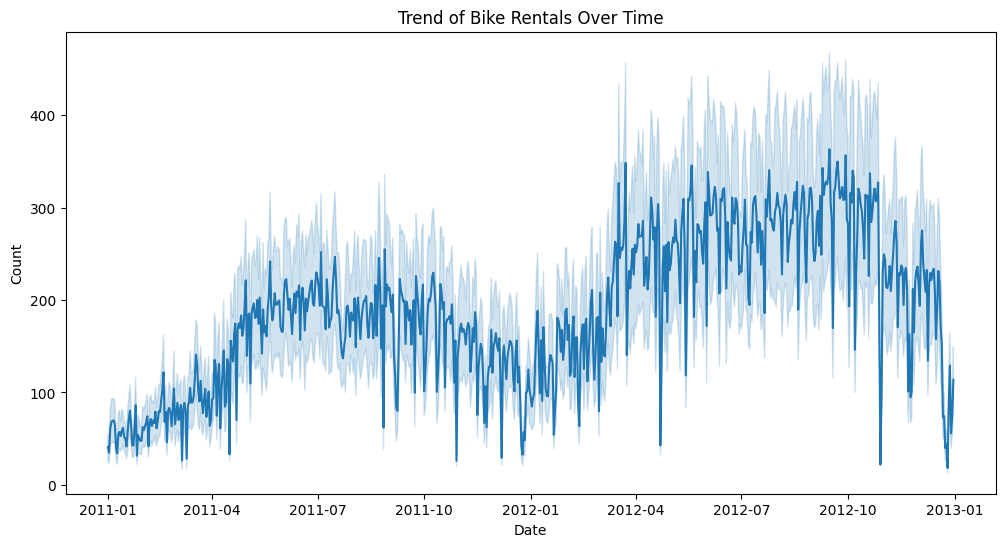

In [8]:
# Time-series analysis
# Tren jumlah penyewaan sepeda berdasarkan waktu
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=hour_df)
plt.title('Trend of Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

### EDA Kategorikal

In [9]:
# EDA Kategorikal
# Distribusi data kategorikal
categorical_columns = hour_df.select_dtypes(include='object').columns

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=hour_df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

### EDA Numerikal

In [10]:
# EDA Numerikal
# Statistik deskriptif kolom numerik
hour_df.describe()

instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.000000      6.000000      0.000000      1.000000      0.000000   
50%        7.000000     12.000000      0.000000      3.000000      1.000000   
75%       10.000000     18.000000      0.000000      5.000000      1.000000   
max       12.000000     23.000000      1.000000      6.000000      1.000000   
std        3.438776      6.914405      0.167165      2.005771      0.465431   

         weathersit          temp         atemp           hum     windspeed  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       1.425283      0.496987      0.475775      0.627229      0.190098   
min        1.000000      0.020000      0.000000      0.000000      0.000000   
25%        1.000000      0.340000      0.333300      0.480000      0.104500   
50%        1.000000      0.500000      0.484800      0.630000      0.194000   
75%        2.000000      0.660000      0.621200      0.780000      0.253700   
max        4.000000      1.000000      1.000000      1.000000      0.850700   
std        0.639357      0.192556      0.171850      0.192930      0.122340   

             casual    registered           cnt  
count  17379.000000  17379.000000  17379.000000  
mean      35.676218    153.786869    189.463088  
min        0.000000      0.000000      1.000000  
25%        4.000000     34.000000     40.000000  
50%       17.000000    115.000000    142.000000  
75%       48.000000    220.000000    281.000000  
max      367.000000    886.000000    977.000000  
std       49.305030    151.357286    181.387599

### Analisis Outlier

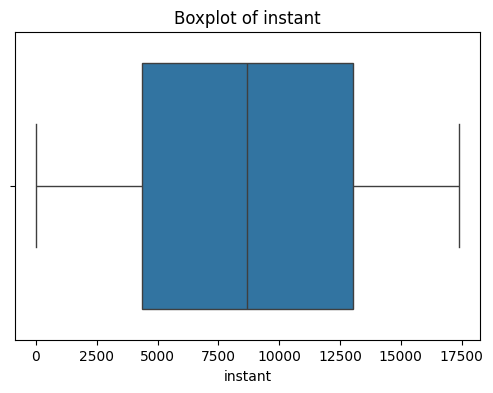

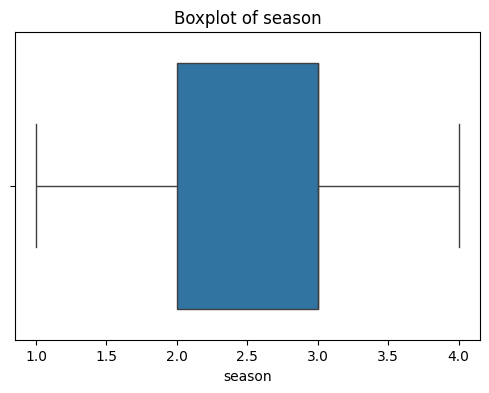

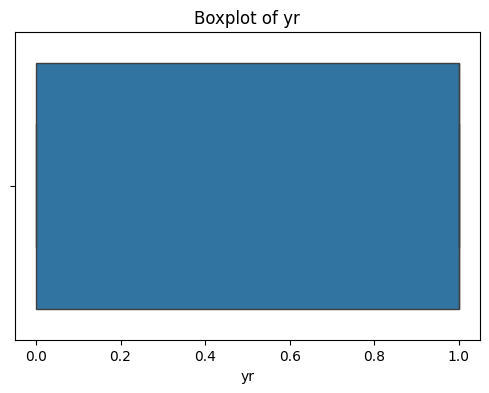

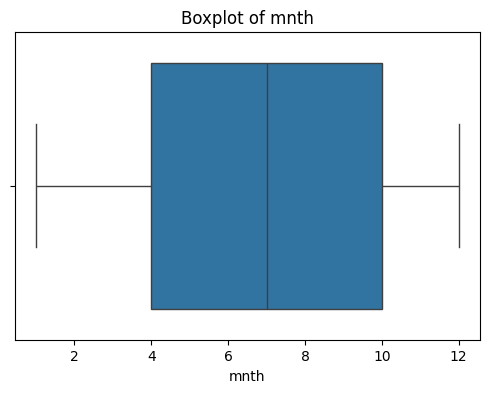

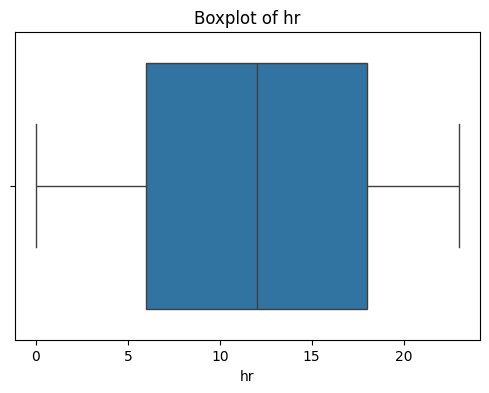

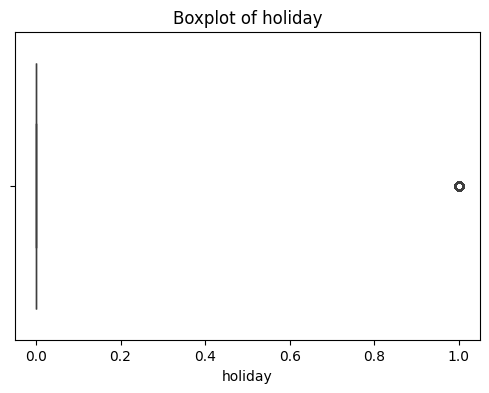

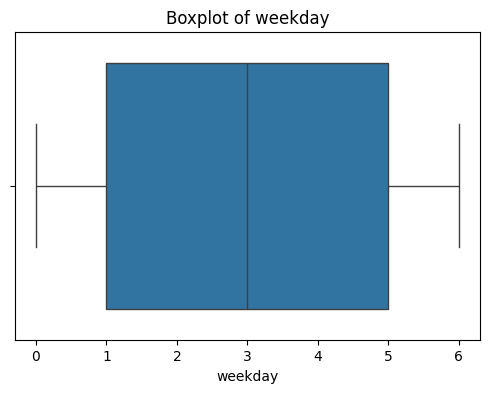

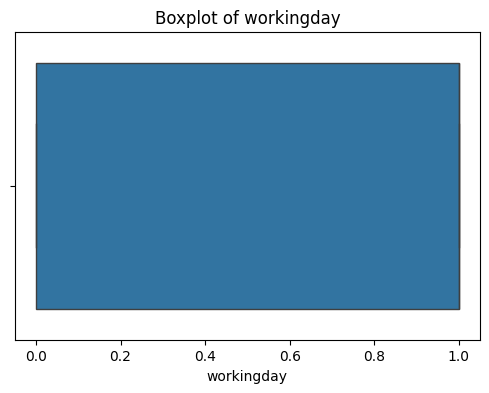

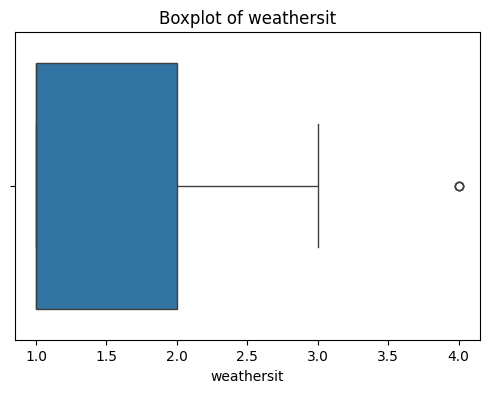

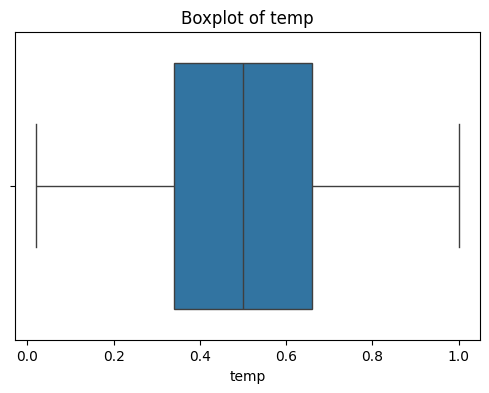

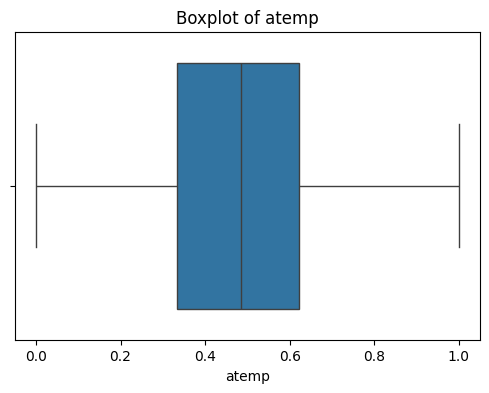

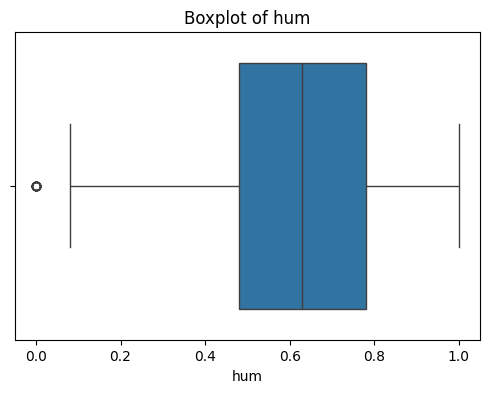

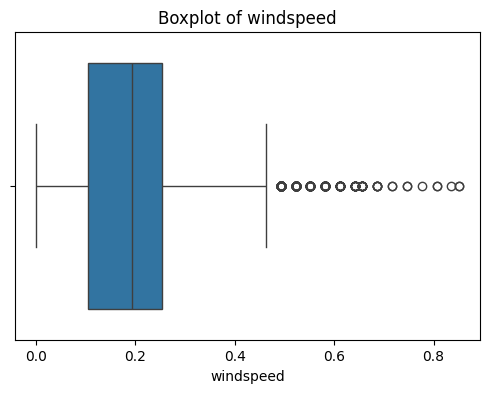

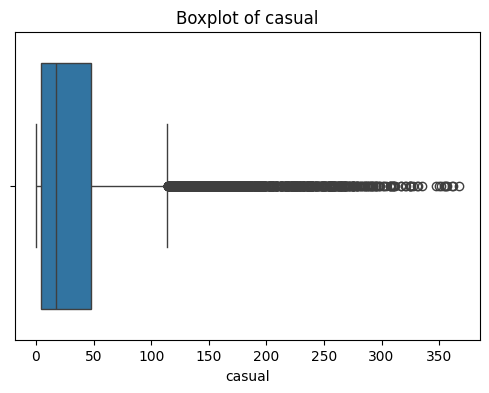

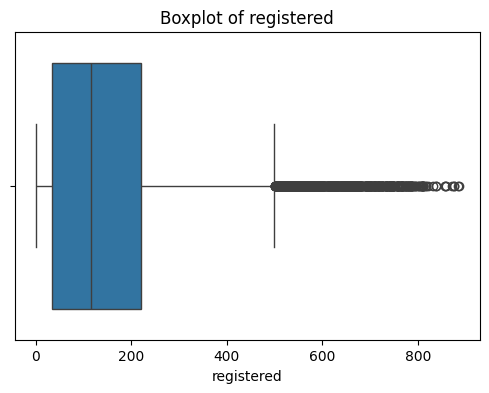

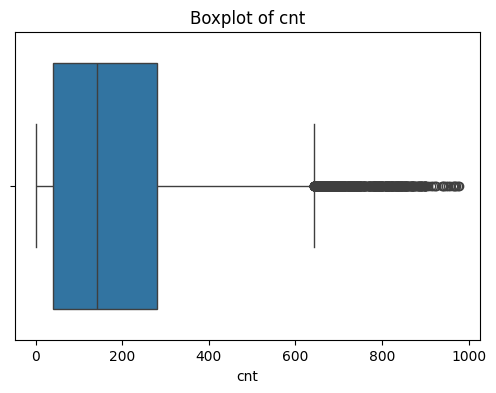

In [11]:
# Analisis Outlier
# Boxplot untuk mendeteksi outlier
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=hour_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Missing Data Analysis

In [12]:
# Missing Data Analysis
# Cek missing value setelah proses cleaning
missing_values = hour_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print("Missing values:")
    print(missing_values)
else:
    print("No missing values found.")

No missing values found.


### Visualisasi Data

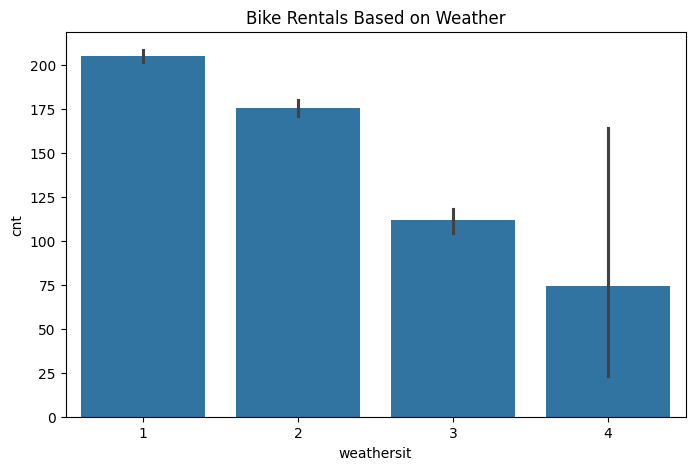

In [13]:
# Visualisasi Data
# Distribusi jumlah penyewaan sepeda berdasarkan cuaca
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=hour_df)
plt.title('Bike Rentals Based on Weather')
plt.show()

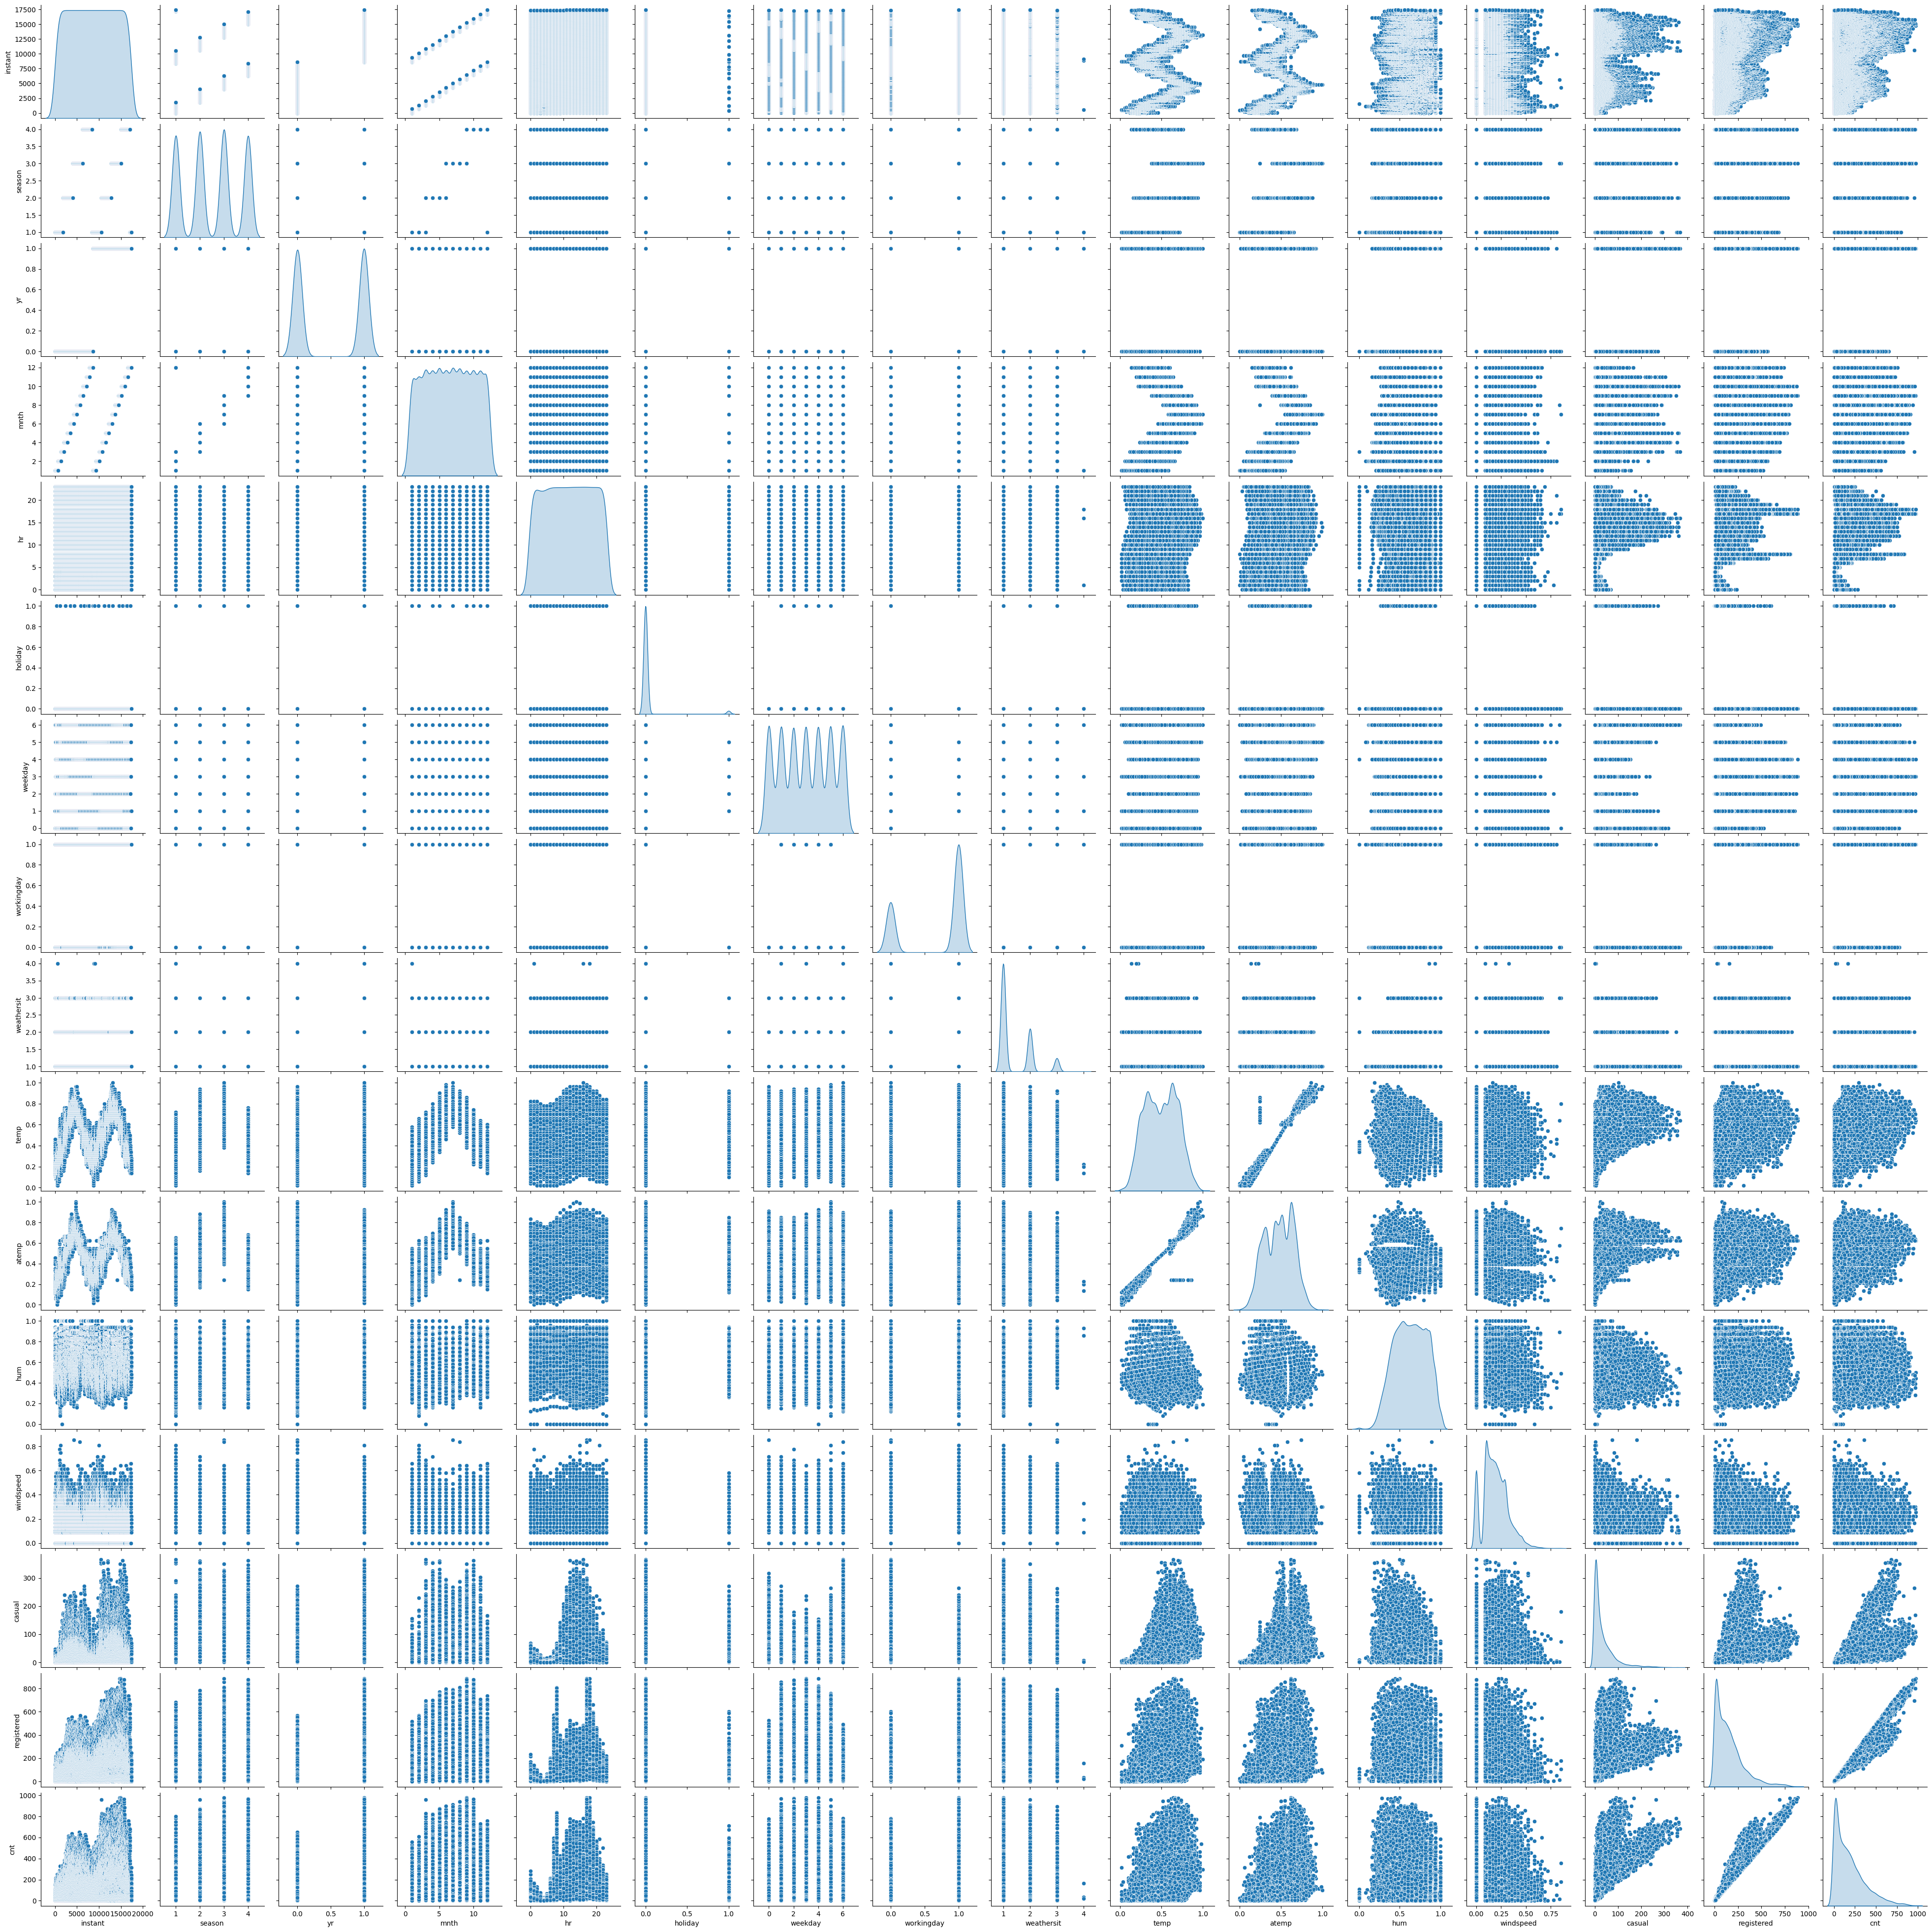

In [14]:
# EDA Multivariate
# Hubungan antara beberapa fitur
sns.pairplot(hour_df, diag_kind='kde')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah Pengaruh Musim Mempengaruhi Penyewaan sepeda?

   season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613


C:\Users\Fajar\AppData\Local\Temp\ipykernel_3292\71610774.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_agg, x='season', y='cnt', palette='coolwarm')


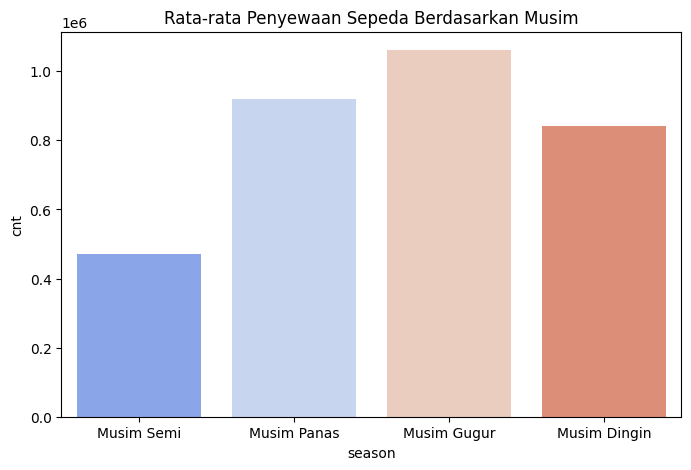

In [15]:
# Agregasi berdasarkan musim
season_agg = hour_df.groupby('season').agg({
    'cnt': 'sum'
}).reset_index()

# Tampilkan hasil agregasi
print(season_agg)

# Visualisasi rata-rata penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(data=season_agg, x='season', y='cnt', palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()


### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

  weathersit      cnt
0      Cerah  2338173
1    Mendung   795952
2      Hujan   158331
3        NaN      223


C:\Users\Fajar\AppData\Local\Temp\ipykernel_3292\1845221228.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_agg, x='weathersit', y='cnt', palette='coolwarm')


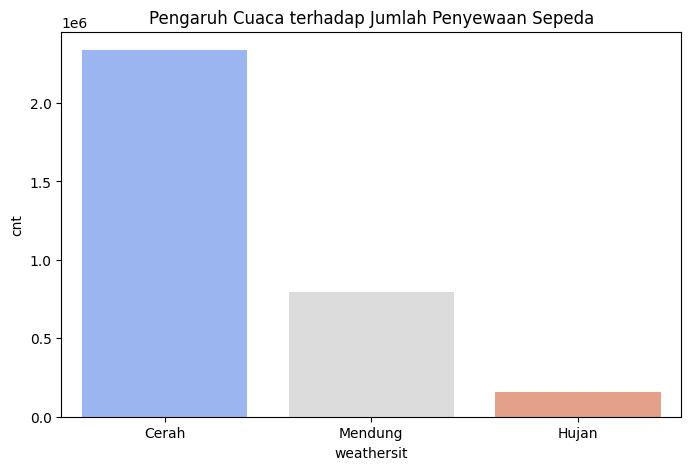

In [16]:
# Agregasi berdasarkan cuaca
weather_agg = hour_df.groupby('weathersit').agg({
    'cnt': 'sum'
}).reset_index()

# Ubah nilai numerik menjadi label yang lebih informatif
weather_labels = {
    1: 'Cerah',
    2: 'Mendung',
    3: 'Hujan'
}
weather_agg['weathersit'] = weather_agg['weathersit'].map(weather_labels)

# Tampilkan hasil agregasi
print(weather_agg)

# Visualisasi pengaruh cuaca terhadap penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.barplot(data=weather_agg, x='weathersit', y='cnt', palette='coolwarm')
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.show()


### Pertanyaan 3: pada jam keberapa penyewaan sepeda paling banyak dilakukan?

    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


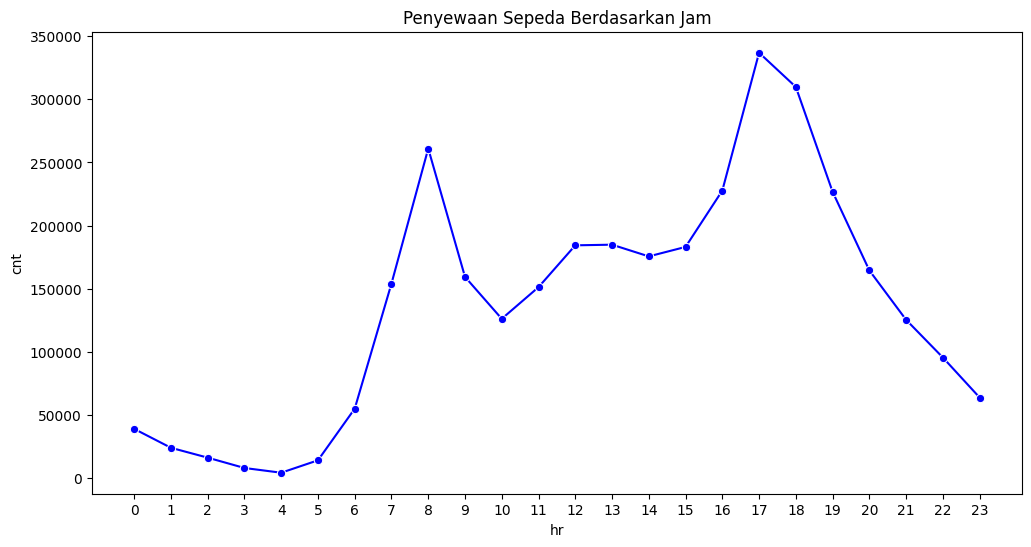

In [17]:
# Agregasi berdasarkan jam
hour_agg = hour_df.groupby('hr').agg({
    'cnt': 'sum'
}).reset_index()

# Tampilkan hasil agregasi
print(hour_agg)

# Visualisasi waktu penyewaan sepeda terbanyak
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_agg, x='hr', y='cnt', marker='o', color='blue')
plt.title('Penyewaan Sepeda Berdasarkan Jam')
plt.xticks(range(0, 24))
plt.show()


## Conclusion

- Penyewaan sepeda cenderung lebih tinggi pada musim gugur dan pada saat cuaca sedang cerah
- Kondisi cuaca yang lebih cerah meningkatkan jumlah penyewaan sepeda, sedangkan hujan apalagi kalau lebat menguranginya secara signifikan.
- penyewaan tertinggi pada jam ke 18
- penyewaan terendah pada jam ke 4